**Сначала настройте приложение, затем создавайте картинки
или выполняйте другие функции**

In [ ]:
#@title **↓ Нажми на кнопку, чтобы всё настроить перед началом работы**
print('\nНастройка началась')
!pip install kaleido --quiet
!pip install gspread==3.6 --quiet
!pip install Pillow --quiet

!curl -o MSUfootballapp.py https://raw.githubusercontent.com/Jinedl/MSUfootballapp/main/MSUfootballapp.py
!curl -o key.json https://raw.githubusercontent.com/Jinedl/MSUfootballapp/main/msufootballauto-a47858fff82b.json
print('\nНастройка завершилась, перезапусти среду выполнения, затем выполняй следующий шаг, сколько угодно раз, без выполнения этого шага')

if 'google.colab' in str(get_ipython()):
    import IPython, ipywidgets, google

    button = ipywidgets.Button(
        description='Нажмите, чтобы перезапустить',
        layout=ipywidgets.Layout(width='auto', height='40px')
    )
    button.on_click(lambda _: get_ipython().kernel.do_shutdown(True))
    IPython.display.display(button)

# **Создание картинок**

## **Создание расписания**

In [ ]:
#@title ↓ Нажми на кнопку, чтобы создать картинку с таблицей, прежде задай параметры ниже

#@markdown # Источники данных
#@markdown Через "/" путь до данных
Источник_данных_для_расписания = 'Google Таблица/IV Летнее Первенство/Расписание' #@param ["Google Таблица/XII Чемпионат ОПК × II Чемпионат выпускников/Расписание", "Google Таблица/IV Летнее Первенство/Расписание"] {allow-input: true}
Источник_данных_для_сокращённых_названий_команд = 'Google Таблица/База данных для автоматизации/Сокращения' #@param ["Google Таблица/База данных для автоматизации/Сокращения"] {allow-input: true}
Источник_данных_для_подложки = 'Google Таблица/База данных для автоматизации/Подложки' #@param ["Google Таблица/База данных для автоматизации/Сокращения", "Загрузить вручную"] {allow-input: true}
Источник_данных_для_шрифта = 'Google Таблица/База данных для автоматизации/Шрифты' #@param ["Google Таблица/База данных для автоматизации/Шрифты", "Загрузить вручную"] {allow-input: true}

#@markdown ---

#@markdown # Даты матчей
#@markdown Нажмите на календарик, чтобы выбрать дату
Дата_матчей_1 = '' #@param {type:"date"}
Дата_матчей_2 = '' #@param {type:"date"}
Дата_матчей_3 = '' #@param {type:"date"}

#@markdown ---

#@markdown # Турниры
#@markdown Отмечайте галочками нужные турниры
#@markdown Если необходимы только конкретные группы или дивизионы, то заполняйте соответствующее поля, иначе не заполняйте

#@markdown ***

ОПК_номер = 13  #@param {type:"integer"}
Чемпионат_ОПК = False #@param {type:"boolean"}
ОПК_дивизионы_через_пробел = ''  #@param {type:"string"}
Стыки = False #@param {type:"boolean"}
Стыки_подтурниры_через_пробел = ''  #@param {type:"string"}

#@markdown ***

ЧВ_номер = 3  #@param {type:"integer"}
Чемпионат_Выпускников = False #@param {type:"boolean"}
ЧВ_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

КР_номер = 11  #@param {type:"integer"}
Кубок_Ректора = False #@param {type:"boolean"}
КР_группы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

МКР_номер = 11  #@param {type:"integer"}
Малый_Кубок_Ректора = False #@param {type:"boolean"}
МКР_группы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

ЛП_номер = 4  #@param {type:"integer"}
Летнее_первенство = False #@param {type:"boolean"}
ЛП_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

КП_год = 2023  #@param {type:"integer"}
Кубок_первокурсникка = False #@param {type:"boolean"}
КП_группы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

ЗЛ_номер = 5  #@param {type:"integer"}
Зимняя_лига = False #@param {type:"boolean"}
ЗЛ_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ---

#@markdown # Название шрифта
Шрифт = 'Trebuchet MS Regular' #@param ["Trebuchet MS Regular", "Trebuchet MS Bold"] {allow-input: true}

#@markdown ---

#@markdown # Размеры картинки
Ширина_выходного_файла_с_расписанием = 1280 #@param {type:"integer"}
Высота_выходного_файла_с_расписанием = 1280 #@param {type:"integer"}
Название_выходного_файла_с_расписанием = 'table.jpg' #@param {type:"string"}

#@markdown ---

from MSUfootballapp import *

timetable_ds = ds_input(Источник_данных_для_расписания, 'timetable')
shortname_ds = ds_input(Источник_данных_для_сокращённых_названий_команд, 'shortname', alternative=True)
background_ds = ds_input(Источник_данных_для_подложки, 'picture', alternative=True)
font_ds = ds_input(Источник_данных_для_шрифта, 'font', alternative=True)

dates = dates_input([Дата_матчей_1, Дата_матчей_2, Дата_матчей_3])

tournaments = tournaments_input([(Стыки, ОПК_номер, Стыки_подтурниры_через_пробел), (Чемпионат_ОПК, ОПК_номер, ОПК_дивизионы_через_пробел), (Чемпионат_Выпускников, ЧВ_номер, ЧВ_дивизионы_через_пробел), (Кубок_Ректора, КР_номер, КР_группы_через_пробел), (Малый_Кубок_Ректора, МКР_номер, МКР_группы_через_пробел), (Летнее_первенство, ЛП_номер, ЛП_дивизионы_через_пробел), (Кубок_первокурсникка, КП_год, КП_группы_через_пробел), (Зимняя_лига, ЗЛ_номер, ЗЛ_дивизионы_через_пробел)])

font = Шрифт

timetable_picture_width = Ширина_выходного_файла_с_расписанием
timetable_picture_height = Высота_выходного_файла_с_расписанием
fname = Название_выходного_файла_с_расписанием

print('\nДелаем картинку')
timetable_picture = make_timetable_picture(background_ds, font_ds, font, timetable_ds, dates, tournaments, shortname_ds)
timetable_picture.resize((timetable_picture_width, timetable_picture_height)).save(fname)
files.download(fname)
print(f'\nКартинка {fname} сделана и загружена на ваш ПК, также её можно найти, нажав кнопку слева в виде папки')

## **Создание обложек для видео**

In [ ]:
#@title ↓ Нажми на кнопку, чтобы создать обложку для матчей из расписания, прежде задай параметры ниже

#@markdown # Источники данных
Источник_данных_для_расписания = 'Google Таблица/IV Летнее Первенство/Расписание' #@param ["Google Таблица/IV Летнее Первенство/Расписание", "Google Таблица/XII Чемпионат ОПК × II Чемпионат выпускников/Расписание"] {allow-input: true}
Источник_данных_для_эмблем = 'Google Таблица/База данных для автоматизации/Эмблемы' #@param ["Google Таблица/База данных для автоматизации/Эмблемы", "Загрузить вручную"] {allow-input: true}
Источник_данных_для_подложки = 'Google Таблица/База данных для автоматизации/Подложки' #@param ["Google Таблица/База данных для автоматизации/Сокращения", "Загрузить вручную"] {allow-input: true}
Источник_данных_для_шрифта = 'Google Таблица/База данных для автоматизации/Шрифты' #@param ["Google Таблица/База данных для автоматизации/Шрифты", "Загрузить вручную"] {allow-input: true}

#@markdown ---

#@markdown # Даты матчей
#@markdown Ненужные поля оставьте пустыми
Дата_матчей_1 = '' #@param {type:"date"}
Дата_матчей_2 = '' #@param {type:"date"}
Дата_матчей_3 = '' #@param {type:"date"}

#@markdown ---

#@markdown # Тип видео
Прямая_трансляция = False #@param {type:"boolean"}
Полный_матч = False #@param {type:"boolean"}
Обзор = False #@param {type:"boolean"}

#@markdown ---

#@markdown # Название шрифта
Шрифт = 'Trebuchet MS Regular' #@param ["Trebuchet MS Regular", "Trebuchet MS Bold"] {allow-input: true}

#@markdown ---

#@markdown # Размеры картинок
Ширина_выходных_файлов_с_обложками = 1280 #@param {type:"integer"}
Высота_выходных_файлов_с_обложками = 720 #@param {type:"integer"}
Название_выходных_файлов_с_обложками = 'cover.jpg' #@param {type:"string"}

#@markdown ---

from MSUfootballapp import *

timetable_ds = ds_input(Источник_данных_для_расписания, 'timetable')
logo_ds = ds_input(Источник_данных_для_эмблем, 'picture', alternative=True)
background_ds = ds_input(Источник_данных_для_подложки, 'picture', alternative=True)
font_ds = ds_input(Источник_данных_для_шрифта, 'font', alternative=True)

dates = dates_input([Дата_матчей_1, Дата_матчей_2, Дата_матчей_3])

video_types = video_types_input([Прямая_трансляция, Полный_матч, Обзор])
font = Шрифт
cover_width = Ширина_выходных_файлов_с_обложками
cover_height = Высота_выходных_файлов_с_обложками
fname = Название_выходных_файлов_с_обложками

print('\nДелаем картинки')
covers = make_many_covers(background_ds, logo_ds, font_ds, font, timetable_ds, video_types, dates)
num = 1
for c in covers:
    c_fname = f'{num}_{fname}'
    num += 1
    c.resize((cover_width, cover_height)).save(c_fname)
    files.download(c_fname)
    print(f'\nКартинка {c_fname} сделана')
print('\nКартинки загружены на ваш ПК, также их можно найти, нажав кнопку слева в виде папки')

## **Создание турнирных таблиц**

In [ ]:
#@title ↓ Нажми на кнопку, чтобы создать картинку с таблицей, прежде задай параметры ниже

#@markdown # Источники данных
#@markdown Через "/" путь до данных
Источник_данных_для_таблиц = 'football.msu.ru' #@param ["football.msu.ru"] {allow-input: true}
Источник_данных_для_кодов_турниров = 'Google Таблица/База данных для автоматизации/Коды' #@param ["Google Таблица/База данных для автоматизации/Коды", "Загрузить вручную"] {allow-input: true}
Источник_данных_для_подложки = 'Google Таблица/База данных для автоматизации/Подложки' #@param ["Google Таблица/База данных для автоматизации/Сокращения", "Загрузить вручную"] {allow-input: true}
Источник_данных_для_шрифта = 'Google Таблица/База данных для автоматизации/Шрифты' #@param ["Google Таблица/База данных для автоматизации/Шрифты", "Загрузить вручную"] {allow-input: true}

#@markdown ---

#@markdown # Турниры
#@markdown Отмечайте галочками нужные турниры
#@markdown Если необходимы только конкретные группы или дивизионы, то заполняйте соответствующее поля, иначе не заполняйте

#@markdown ***

ОПК_номер = 13  #@param {type:"integer"}
Чемпионат_ОПК = False #@param {type:"boolean"}
ОПК_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

ЧВ_номер = 3  #@param {type:"integer"}
Чемпионат_Выпускников = False #@param {type:"boolean"}
ЧВ_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

КР_номер = 11  #@param {type:"integer"}
Кубок_Ректора = False #@param {type:"boolean"}
КР_группы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

МКР_номер = 11  #@param {type:"integer"}
Малый_Кубок_Ректора = False #@param {type:"boolean"}
МКР_группы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

ЛП_номер = 4  #@param {type:"integer"}
Летнее_первенство = False #@param {type:"boolean"}
ЛП_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

КП_год = 2023  #@param {type:"integer"}
Кубок_первокурсникка = False #@param {type:"boolean"}
КП_группы_через_пробел = ''  #@param {type:"string"}

#@markdown ***

ЗЛ_номер = 5  #@param {type:"integer"}
Зимняя_лига = False #@param {type:"boolean"}
ЗЛ_дивизионы_через_пробел = ''  #@param {type:"string"}

#@markdown ---

#@markdown # Название шрифта
Шрифт = 'Trebuchet MS Regular' #@param ["Trebuchet MS Regular", "Trebuchet MS Bold"] {allow-input: true}

#@markdown ---

#@markdown # Размеры картинки
Ширина_выходного_файла_с_турнирной_таблицей = 1280 #@param {type:"integer"}
Высота_выходного_файла_с_турнирной_таблицей = 1280 #@param {type:"integer"}
Название_выходного_файла_с_турнирной_таблицей = 'competition.jpg' #@param {type:"string"}

#@markdown ---

from MSUfootballapp import *

tournament_table_ds = ds_input(Источник_данных_для_таблиц, 'tournament_table')
tournament_code_ds = ds_input(Источник_данных_для_кодов_турниров, 'code', alternative=True)
background_ds = ds_input(Источник_данных_для_подложки, 'picture', alternative=True)
font_ds = ds_input(Источник_данных_для_шрифта, 'font', alternative=True)

tournaments = tournaments_input([(False, ОПК_номер, ''), (Чемпионат_ОПК, ОПК_номер, ОПК_дивизионы_через_пробел), (Чемпионат_Выпускников, ЧВ_номер, ЧВ_дивизионы_через_пробел), (Кубок_Ректора, КР_номер, КР_группы_через_пробел), (Малый_Кубок_Ректора, МКР_номер, МКР_группы_через_пробел), (Летнее_первенство, ЛП_номер, ЛП_дивизионы_через_пробел), (Кубок_первокурсникка, КП_год, КП_группы_через_пробел), (Зимняя_лига, ЗЛ_номер, ЗЛ_дивизионы_через_пробел)])

font = Шрифт

tournament_table_picture_width = Ширина_выходного_файла_с_турнирной_таблицей
tournament_table_picture_height = Высота_выходного_файла_с_турнирной_таблицей
fname = Название_выходного_файла_с_турнирной_таблицей

print('\nДелаем картинки')
tournament_tables = make_tournament_table_picture(background_ds, font_ds, font, tournament_code_ds, tournament_table_ds, tournaments)
num = 1
for tt in tournament_tables:
    tt_fname = f'{num}_{fname}'
    num += 1
    tt.resize((tournament_table_picture_width, tournament_table_picture_height)).save(tt_fname)
    files.download(tt_fname)
    print(f'\nКартинка {tt_fname} сделана')
print('\nКартинки загружены на ваш ПК, также их можно найти, нажав кнопку слева в виде папки')

## **Создание команд**

In [ ]:
#@title ↓ Нажми на кнопку, чтобы создать картинку с командой, прежде задай параметры ниже

#@markdown # Источники данных
#@markdown Через "/" путь до данных
Источник_данных_для_фото_игроков = 'Загрузить вручную' #@param ["Загрузить вручную"] {allow-input: true}
Источник_данных_для_подложки = 'Google Таблица/База данных для автоматизации/Подложки' #@param ["Google Таблица/База данных для автоматизации/Сокращения", "Загрузить вручную"] {allow-input: true}
Источник_данных_для_шрифта = 'Google Таблица/База данных для автоматизации/Шрифты' #@param ["Google Таблица/База данных для автоматизации/Шрифты", "Загрузить вручную"] {allow-input: true}

#@markdown ---

#@markdown # Данные для надписей сверху и снизу
#@markdown Поля можно оставить пустыми
Заголовок = 'СИМВОЛИЧЕСКАЯ СБОРНАЯ' #@param ["СИМВОЛИЧЕСКАЯ СБОРНАЯ"] {allow-input: true}
Подзаголовок = '' #@param {type:"string"}
#@markdown Турнир (номер турнира и аббревиатура - например, "4 ЛП") нужен для надписи снизу
Турнир = '' #@param {type:"string"}

#@markdown ---

#@markdown # Данные игроков
#@markdown ФИО лишних игроков оставьте пустыми

#@markdown На картинке у игроков будут написаны фамилия и имя (первые два слова из ФИО) и текст из поля Информация_об_игроке_N (этой информацией может быть название команды игрока, при ненадобности оставьте это поле пустым)

#@markdown Соотношение названия позиций и их расположения на картинке указано в инструкции в пункте "Как ввести данные в приложении"

#@markdown ***

#@markdown # Игрок 1
ФИО_игрока_1_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_1 = '' #@param {type:"string"}
Голы_игрока_1 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_1 = 0 #@param {type:"integer"}
Позиция_игрока_1 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 2
ФИО_игрока_2_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_2 = '' #@param {type:"string"}
Голы_игрока_2 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_2 = 0 #@param {type:"integer"}
Позиция_игрока_2 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 3
ФИО_игрока_3_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_3 = '' #@param {type:"string"}
Голы_игрока_3 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_3 = 0 #@param {type:"integer"}
Позиция_игрока_3 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 4
ФИО_игрока_4_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_4 = '' #@param {type:"string"}
Голы_игрока_4 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_4 = 0 #@param {type:"integer"}
Позиция_игрока_4 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 5
ФИО_игрока_5_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_5 = '' #@param {type:"string"}
Голы_игрока_5 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_5 = 0 #@param {type:"integer"}
Позиция_игрока_5 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 6
ФИО_игрока_6_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_6 = '' #@param {type:"string"}
Голы_игрока_6 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_6 = 0 #@param {type:"integer"}
Позиция_игрока_6 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 7
ФИО_игрока_7_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_7 = '' #@param {type:"string"}
Голы_игрока_7 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_7 = 0 #@param {type:"integer"}
Позиция_игрока_7 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 8
ФИО_игрока_8_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_8 = '' #@param {type:"string"}
Голы_игрока_8 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_8 = 0 #@param {type:"integer"}
Позиция_игрока_8 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 9
ФИО_игрока_9_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_9 = '' #@param {type:"string"}
Голы_игрока_9 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_9 = 0 #@param {type:"integer"}
Позиция_игрока_9 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 10
ФИО_игрока_10_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_10 = '' #@param {type:"string"}
Голы_игрока_10 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_10 = 0 #@param {type:"integer"}
Позиция_игрока_10 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ***

#@markdown # Игрок 11
ФИО_игрока_11_через_пробел = '' #@param {type:"string"}
Информация_об_игроке_11 = '' #@param {type:"string"}
Голы_игрока_11 = 0 #@param {type:"integer"}
Голевые_передачи_игрока_11 = 0 #@param {type:"integer"}
Позиция_игрока_11 = 'ВРТ' #@param ["ВРТ", "ЛЗ", "ЛЦЗ", "ЦЦЗ", "ПЦЗ", "ПЗ", "ЛП", "ЛЦП", "ЦЦП", "ПЦП", "ПП", "ЛН", "ЛЦН", "ЦН", "ПЦН", "ПН"]

#@markdown ---

#@markdown # Название шрифта
Шрифт = 'Trebuchet MS Regular' #@param ["Trebuchet MS Regular", "Trebuchet MS Bold"] {allow-input: true}

#@markdown ---

#@markdown # Размеры картинок
Ширина_выходных_файлов_с_обложками = 1280 #@param {type:"integer"}
Высота_выходных_файлов_с_обложками = 960 #@param {type:"integer"}
Название_выходных_файлов_с_обложками = 'team.jpg' #@param {type:"string"}

#@markdown ---

from MSUfootballapp import *

player_ds = ds_input(Источник_данных_для_фото_игроков, 'picture', alternative=True)
background_ds = ds_input(Источник_данных_для_подложки, 'picture', alternative=True)
font_ds = ds_input(Источник_данных_для_шрифта, 'font', alternative=True)

title = (Заголовок, Подзаголовок)
tournament = Турнир

player_1 = (ФИО_игрока_1_через_пробел, Информация_об_игроке_1, Голы_игрока_1, Голевые_передачи_игрока_1, Позиция_игрока_1)
player_2 = (ФИО_игрока_2_через_пробел, Информация_об_игроке_2, Голы_игрока_2, Голевые_передачи_игрока_2, Позиция_игрока_2)
player_3 = (ФИО_игрока_3_через_пробел, Информация_об_игроке_3, Голы_игрока_3, Голевые_передачи_игрока_3, Позиция_игрока_3)
player_4 = (ФИО_игрока_4_через_пробел, Информация_об_игроке_4, Голы_игрока_4, Голевые_передачи_игрока_4, Позиция_игрока_4)
player_5 = (ФИО_игрока_5_через_пробел, Информация_об_игроке_5, Голы_игрока_5, Голевые_передачи_игрока_5, Позиция_игрока_5)
player_6 = (ФИО_игрока_6_через_пробел, Информация_об_игроке_6, Голы_игрока_6, Голевые_передачи_игрока_6, Позиция_игрока_6)
player_7 = (ФИО_игрока_7_через_пробел, Информация_об_игроке_7, Голы_игрока_7, Голевые_передачи_игрока_7, Позиция_игрока_7)
player_8 = (ФИО_игрока_8_через_пробел, Информация_об_игроке_8, Голы_игрока_8, Голевые_передачи_игрока_8, Позиция_игрока_8)
player_9 = (ФИО_игрока_9_через_пробел, Информация_об_игроке_9, Голы_игрока_9, Голевые_передачи_игрока_9, Позиция_игрока_9)
player_10 = (ФИО_игрока_10_через_пробел, Информация_об_игроке_10, Голы_игрока_10, Голевые_передачи_игрока_10, Позиция_игрока_10)
player_11 = (ФИО_игрока_11_через_пробел, Информация_об_игроке_11, Голы_игрока_11, Голевые_передачи_игрока_11, Позиция_игрока_11)
players = [player_1, player_2, player_3, player_4, player_5, player_6, player_7, player_8, player_9, player_10, player_11]
players = players_input(players)

font = Шрифт
team_width = Ширина_выходных_файлов_с_обложками
team_height = Высота_выходных_файлов_с_обложками
fname = Название_выходных_файлов_с_обложками

print('\nДелаем картинки')
team = make_team_picture(background_ds, font_ds, font, player_ds, players, title, tournament)
team.resize((team_width, team_height)).save(fname)
files.download(fname)
print(f'\nКартинка {fname} сделана и загружена на ваш ПК, также её можно найти, нажав кнопку слева в виде папки')

# **Всё о приложении**

## **Инструкция по использованию приложения**

### **Как настроить приложение перед началом работы**

Для использования любых функций приложения перед началом использования НЕОБХОДИМО нажать первую кнопку

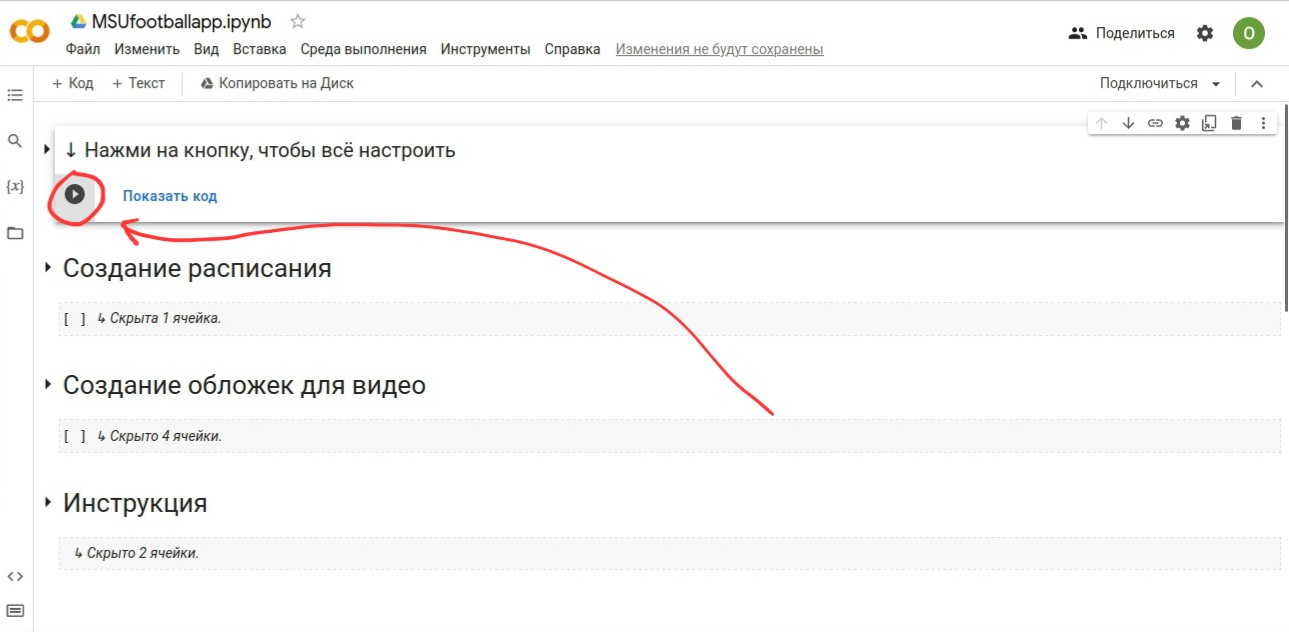

Затем дождаться выпонения настройки приложения и нажать на появившуюся кнопку для перезапуска приложения, в правом верхнем углу на короткое время должна появится надпись "Перезапуск"

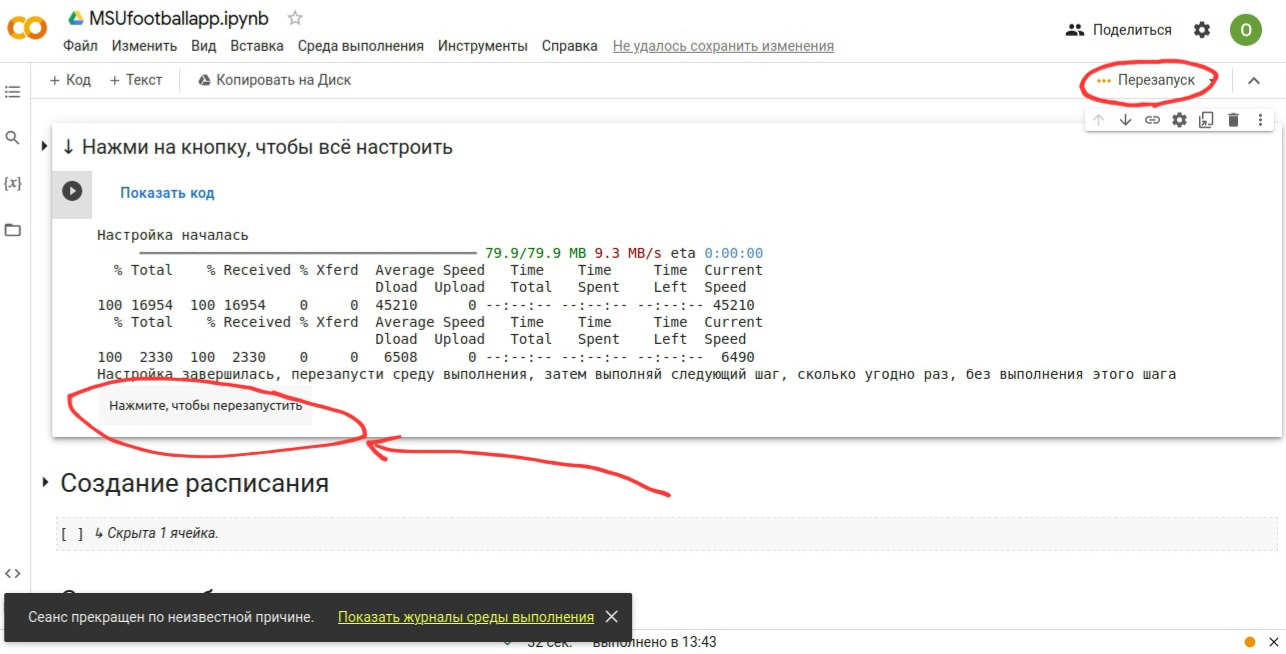

Если надписи "Перезапуск" не было или по каким-то причинам приложение не перезапустилось, то это можно сделать вручную, нажав сверху "Среда выполнения" -> "Перезапустить среду выполнения"

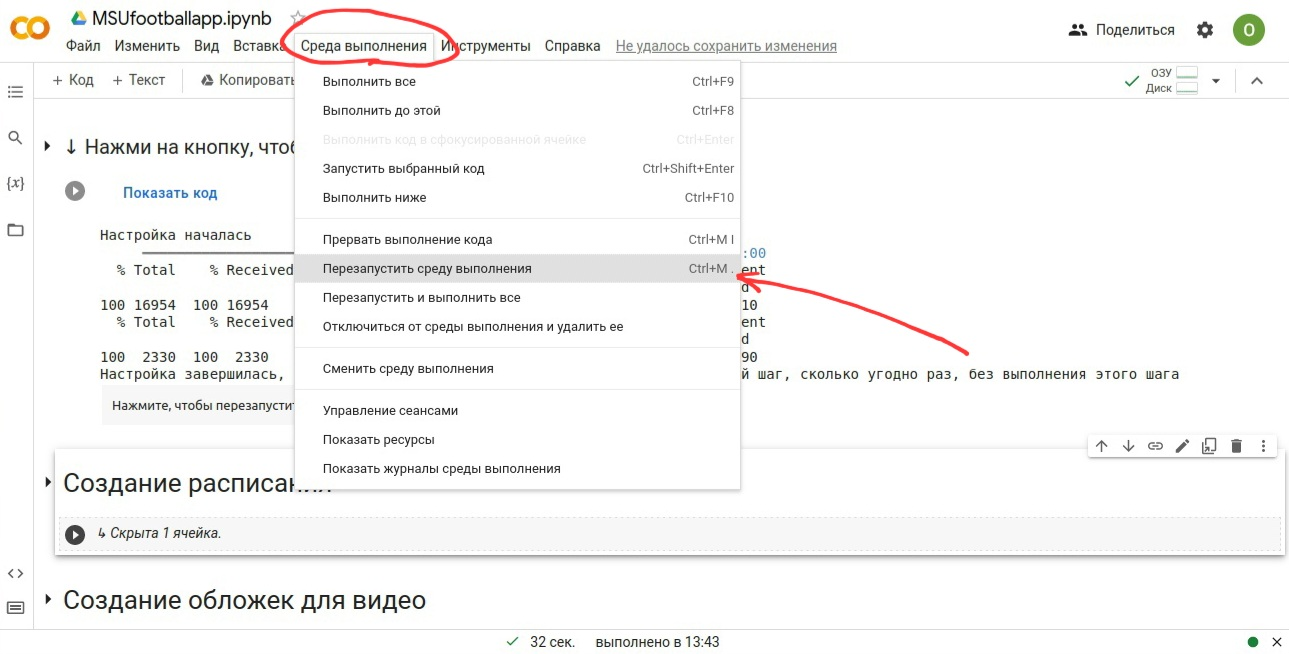

После этого можно переходить к функциям приложения

### **Как ввести данные**

Перед выполнением функций приложения (созданием картинок) нужно ввести данные

#### **Как ввести данные в приложении**

В приложении есть следующие типы ячеек для ввода:

**Ячейка для текста**

Можно ввести текст вручную, можно выбрать один из существующих вариантов из списка при наличии справа кнопки-треугольника

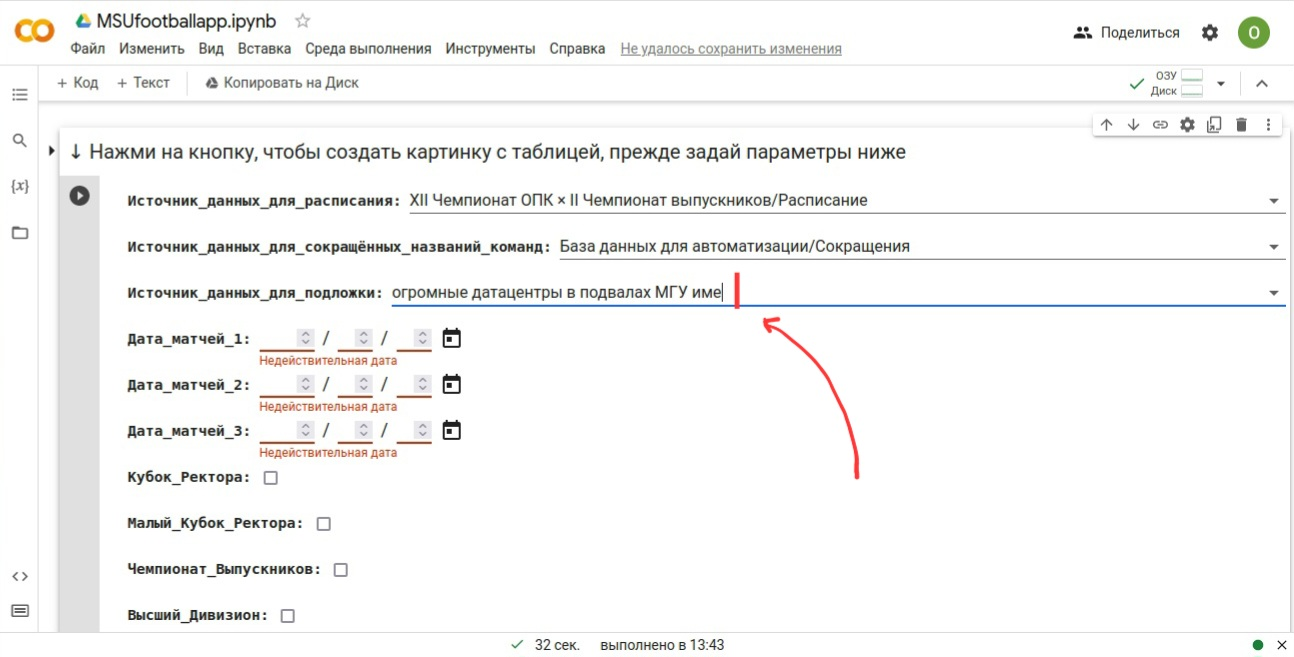
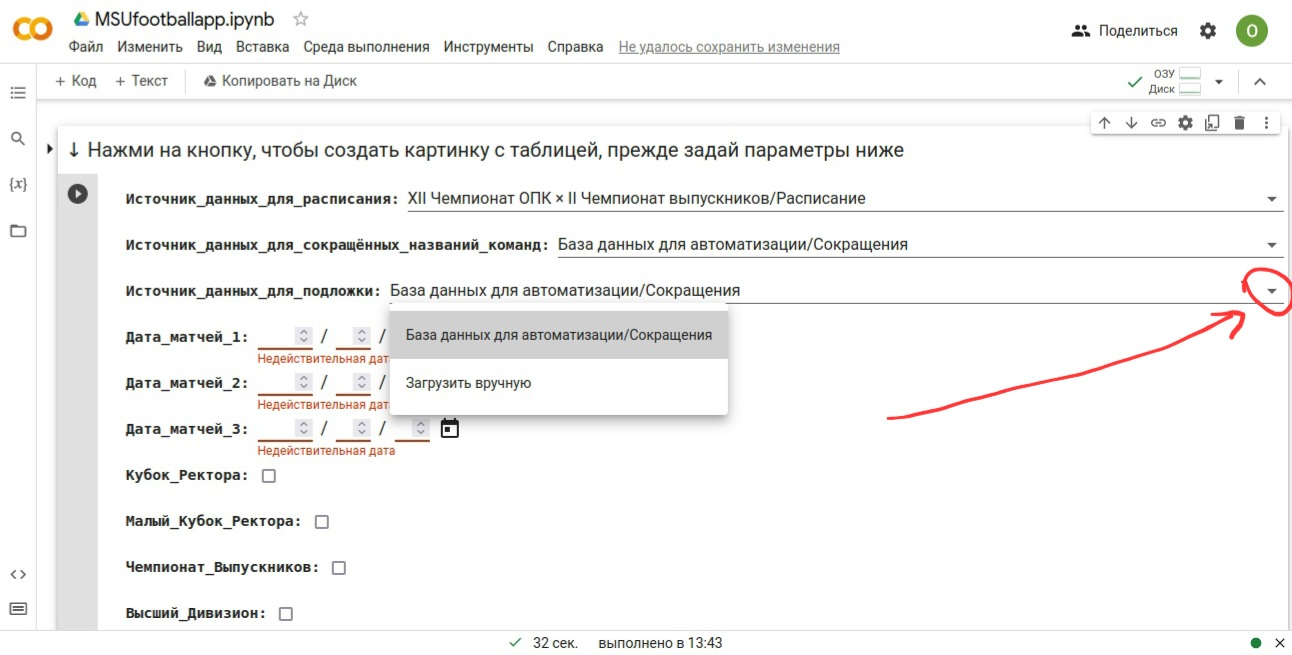

**Ячейка для даты**

Дата вводится в формате ГГГГ/ММ/ДД

Также можно выбрать нужную дату из календаря

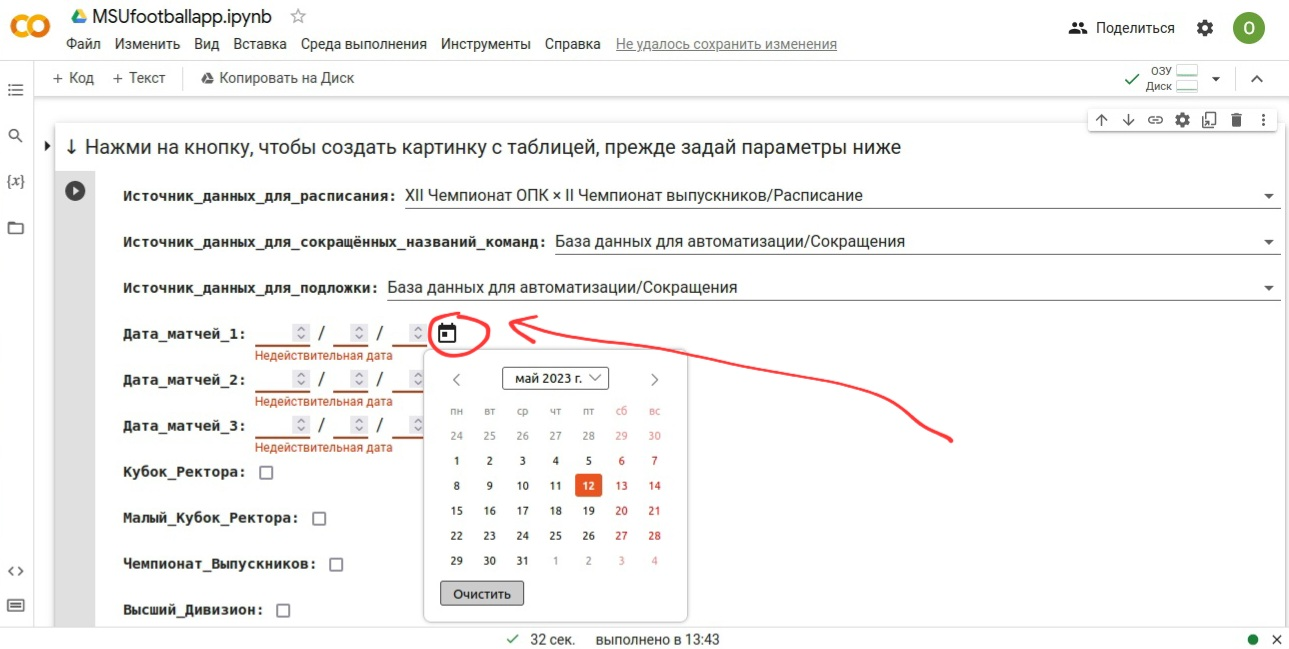

**Ячейка с галочкой**

Чтобы поставить или снять галочку, нужно нажать на квадратик

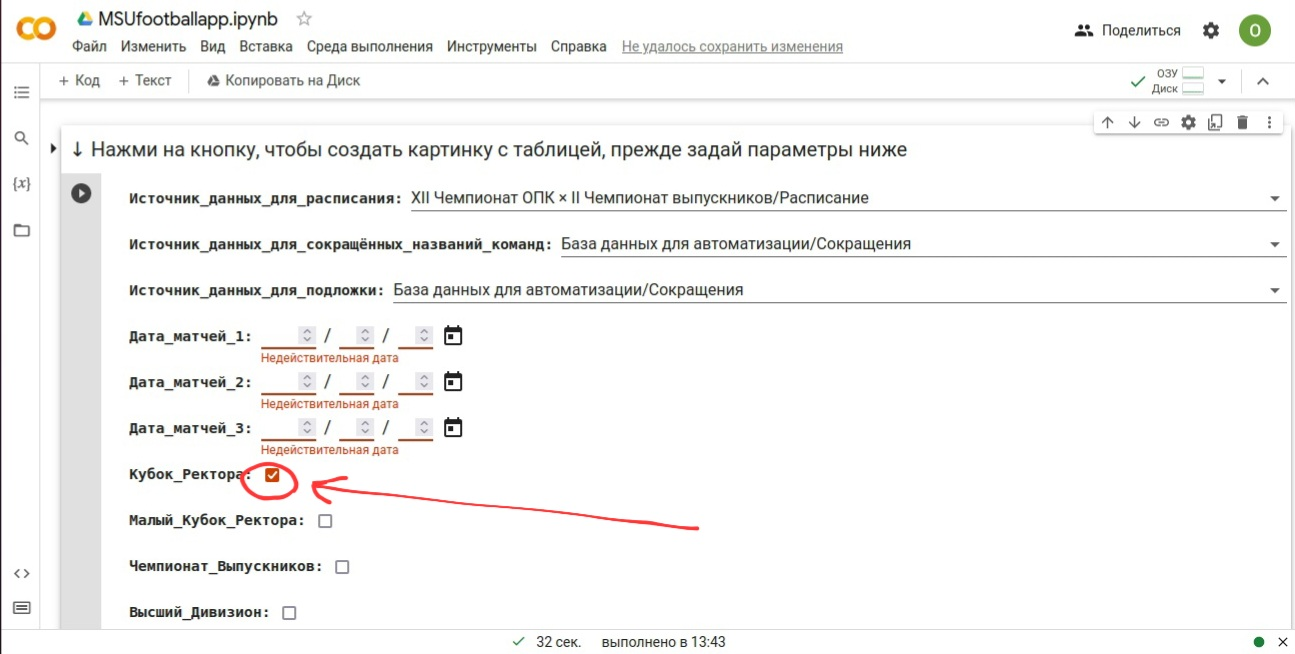

**Соотношение названия позиций и их расположения на картинке для функции "Создание команд"**

Можно сделать картинку с любым числом игроков от 0 до 11

Есть четыре линии (от самой левой на картинке к самой правой на картинке линии): вратарь (ВРТ), защита (З), полузащита (П), нападение (Н); в каждой линии игроки распологаются в следующем порядке (от самого верхнего игрока к самому нижнему): левый (Л), левый центральный (ЛЦ), центральный центральный (ЦЦ), правый центральный (ПЦ), правый (П)

На картинке игроки в каждой линии центрируются, располагаются симметрично

Вот два примера картинок:

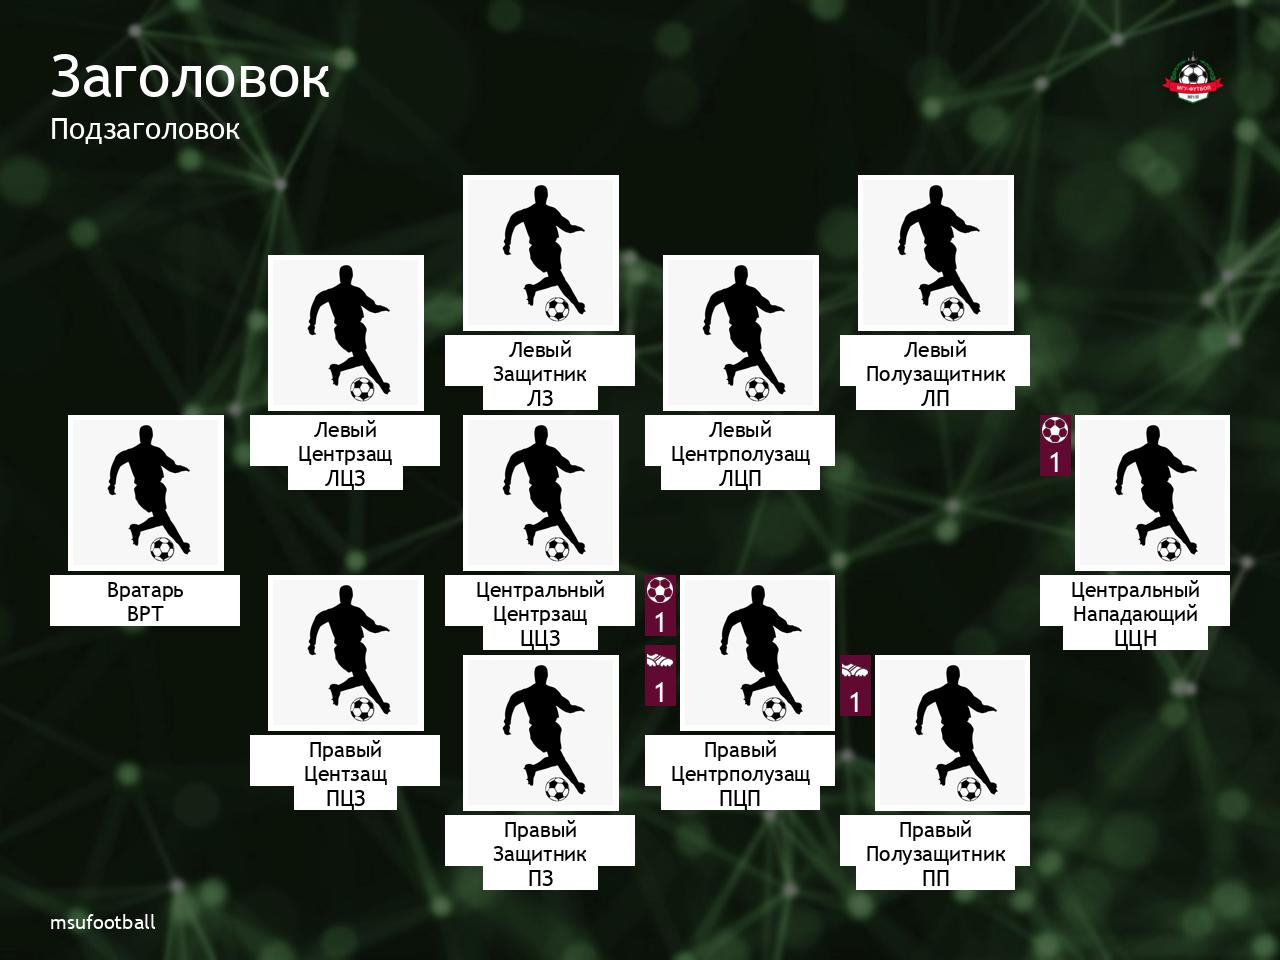

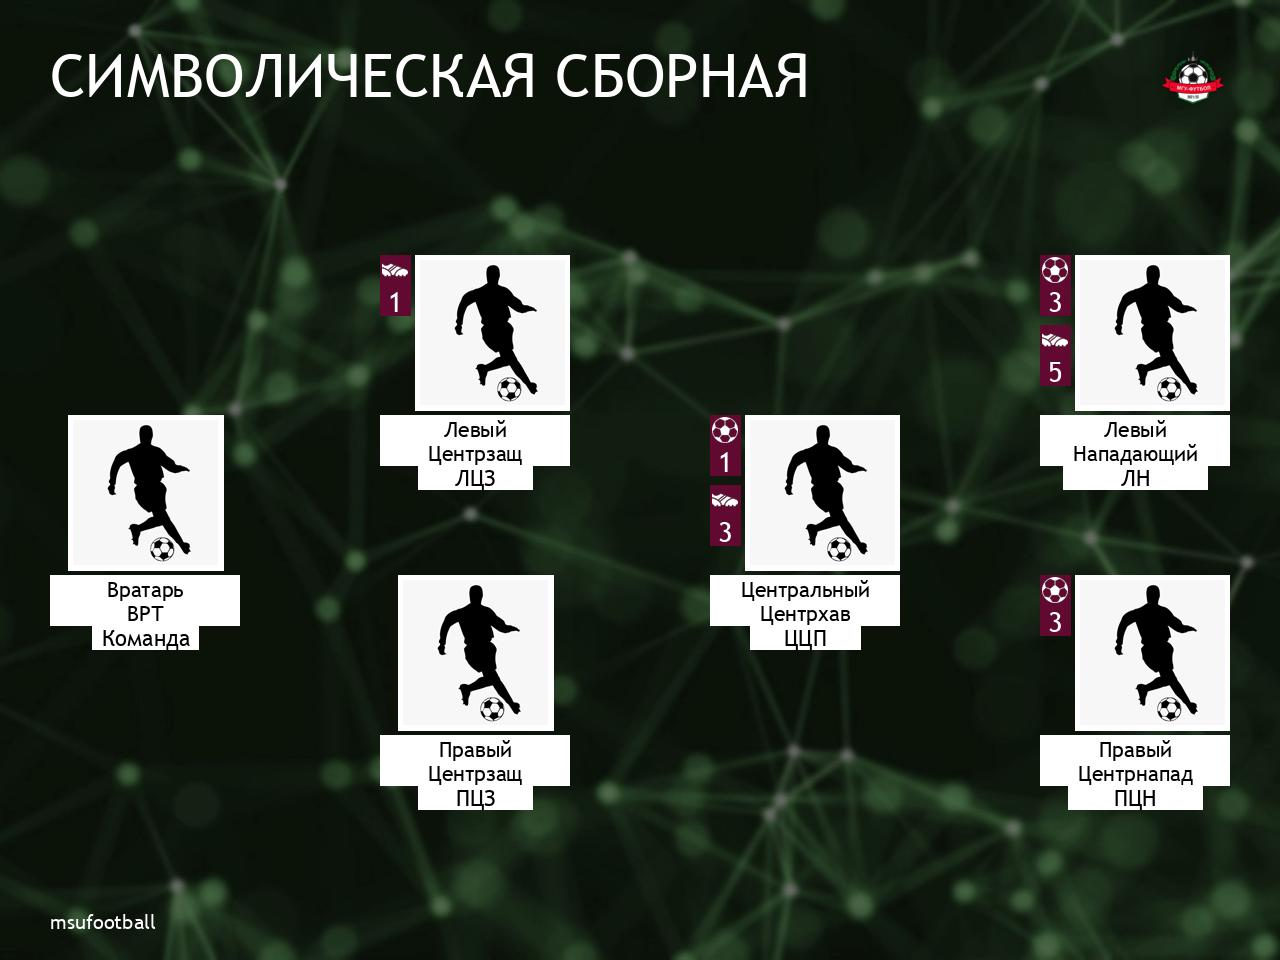

#### **Как ввести данные из баз данных**

Чтобы ввести данные из базы данных, нужно подключить базу данных, также база данных должна быть заполнена согласно требованиям

##### **Требования к Google Spreadsheet для использования в качестве базы данных**

Чтобы документ можно было использовать для приложения, нужно сделать аккаунт

msufootballauto@msufootballauto.iam.gserviceaccount.com

читателем документа

Для использования Google таблицы в качестве базы данных в приложении в поле "Источник_данных_для_xxxx" через символ "/" без пробелов нужно ввести "Google Таблица", название документа и нужный лист.

Примеры Google таблиц в качестве баз данных:

- Google Таблица/Пример документа для футбольных турниров/Расписание
- Google Таблица/Пример документа для футбольных турниров/База данных
- Google Таблица/База данных для автоматизации/Подложки
- Google Таблица/База данных для автоматизации/Сокращения

**Google Таблица как база данных для расписания**

В любом документе с расписанием (используется для создания расписаний и обложек для видео) должны быть следующие следующие столбцы именно с такими названиями:

- **Дата** : формат - дд.мм (если номер дня - цифра, то начинать с нуля)
- **ДН** : формат - пн, вт, ср, чт, пт, сб, вс
- **Время** : формат - чч:мм
- **Поле** : писать полностью
- **Див** : формат - ОПК, ЧВ, КР, МКР, ЛП, КП, ЗЛ, Стыки затем группа или дивизион при наличии
  - ! Если у турнира есть и "Высший дивизион" (Выш), и "Дивизион В" (В), то "Дивизион В" нужно записывать в таблице и приложении латинской буквой "B" (бэ)
- **Тур** : формат - число, либо плей-офф: 1/число, 3 м, ф
- **Счет** : голы:голы
- **Команда 1** : название команды
- **Команда 2** : название команды
- **Видео** : тот, кто снимает (этот столбец используется только для создания обложек для видео)

**Google Таблица как база данных для хранения информации по ключу**

По ключу может хранится ссылка на файл, текст и что угодно, что можно записать в виде текста в Google Таблицу

В любом документе типа "база данных для хранения инофрмации по ключу" должны быть записи следующего вида (две соседние колонки):

\| уникальный ключ в нижнем регистре \| сами данные (текст, ссылка на что-либо) \|

**Пример Google таблицы как базы данных**

https://docs.google.com/spreadsheets/d/1oWOj54fjczbCWkq6oeqb2YBZGtWhw9BINC1KgFuuBWk/edit?usp=sharing

#### Как сбросить данные

**Сброс данных**

Чтобы сбросить данные, введённые в приложении, перезагрузите страницу, чтобы сбросить данные, полученные из баз данных, перезапустите среду выполнения

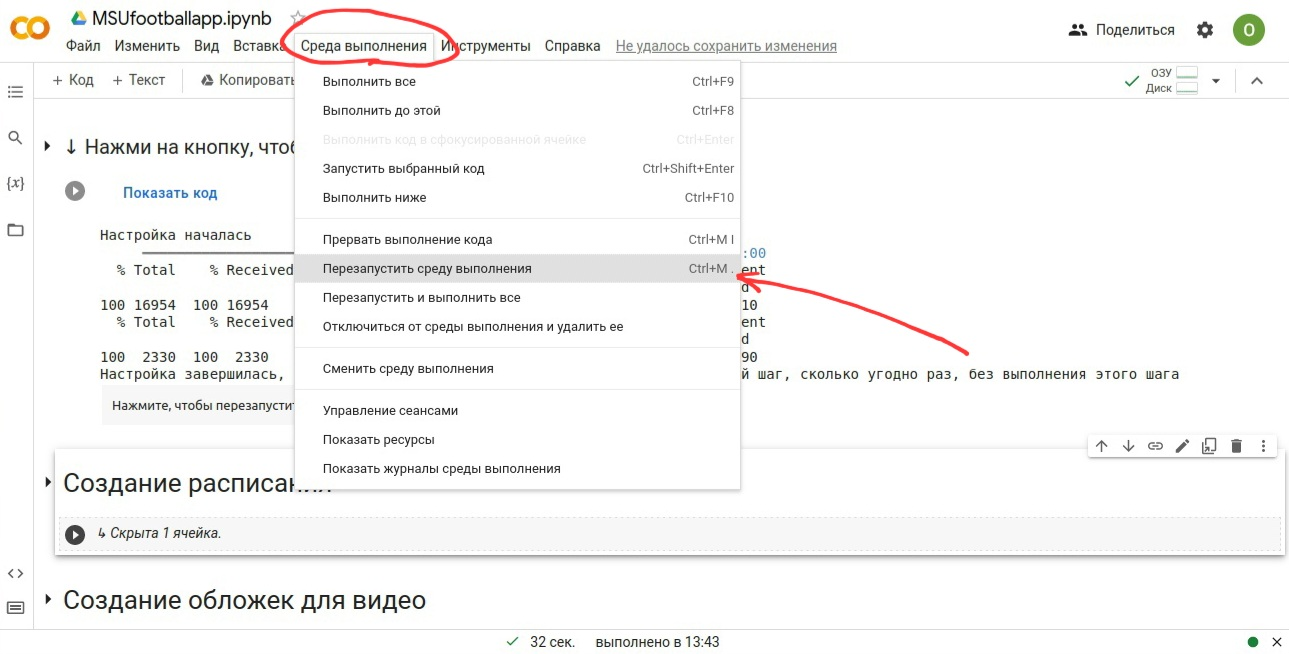

### **Как воспользоваться функциями приложения (как создать картинки)**

Прежде чем выполнять функции (создавать картинки) настройте приложение и введите данные

Для выполнения функций необходимо нажать в левом верхнем углу функции

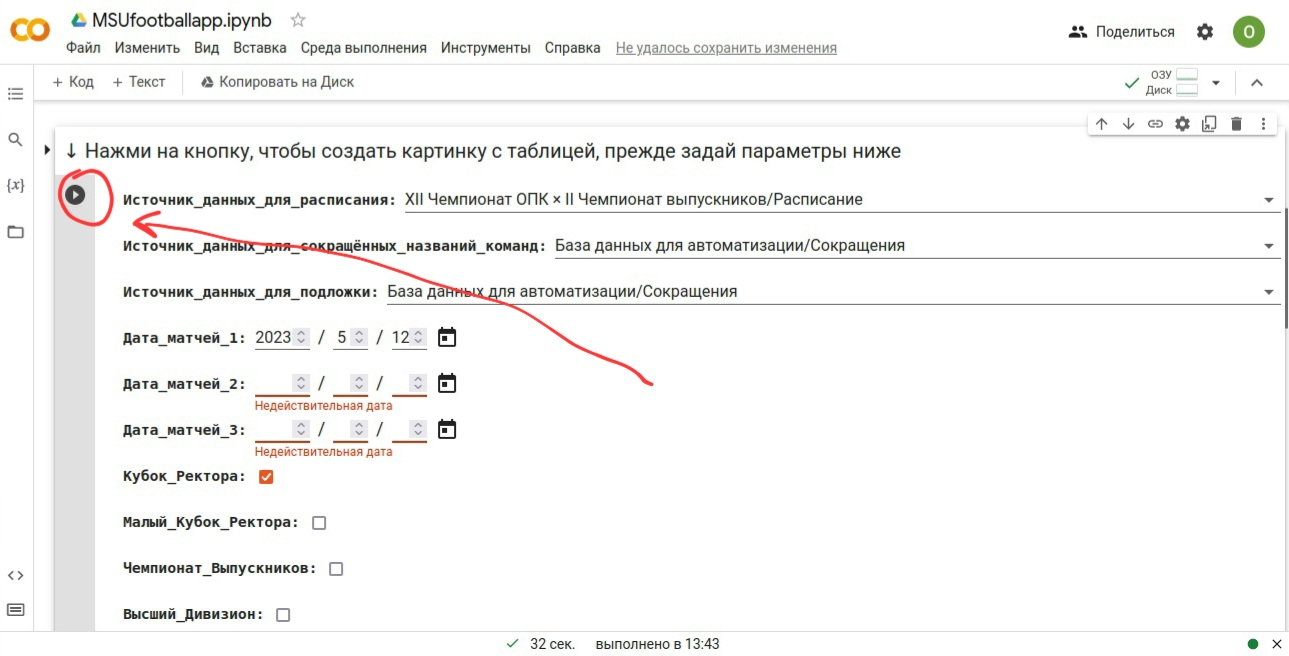

### **Как исправить ошибки**

Если возникают ошибки, попробуйте вручную перезапустить приложение, нажав сверху "Среда выполнения" -> "Перезапустить среду выполнения"

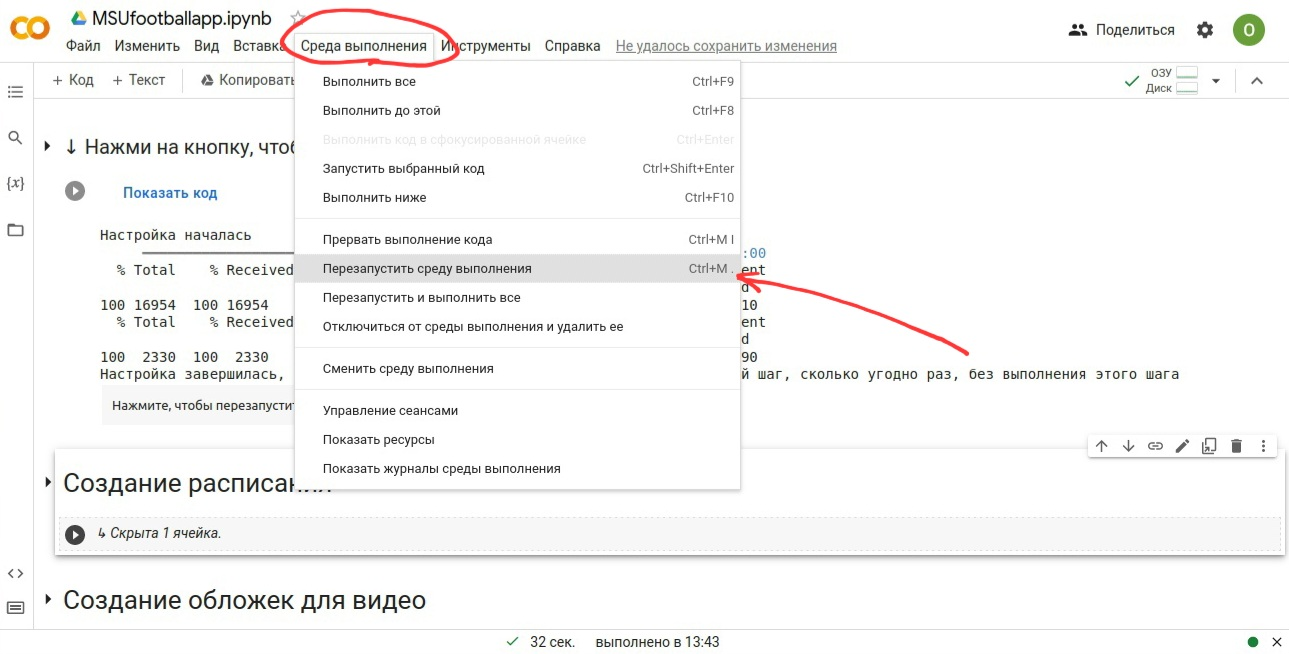

Если предыдущий шаг не помог, попробуйте перезапустить приложение более радикально, нажав сверху "Среда выполнения" -> "Отключить от среды выполнения и удалить её"

Затем заново работайте с приложением, начав с его настройки

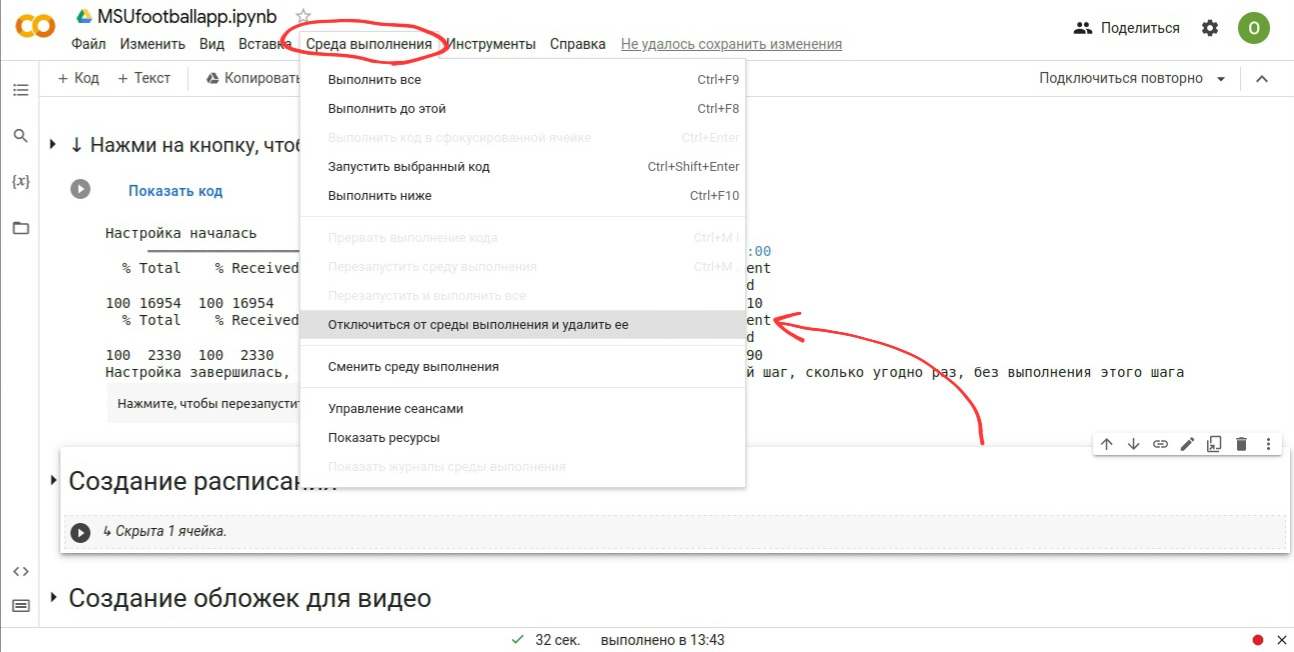

Если предыдущие шаги не помогли, вероятно, есть проблемы с источником данных, например:
- в расписание добавили новый столбец, не сообщив @Jinedl
- в таблице в строках нужных для конкретной функции есть заполненные текстом ячейки (например, заполненные пробелами) вне используемых столбцов (в т.ч. в самой первой строке с названиями колонок) - их нужно удалить
- ссылка на картинку ведёт не на картинку, а не пойми куда
- превышен дневной лимит скачивания с Я.Диска
- ...

Если есть возможность проверьте наличие таких ошибок и исправьте их

Если ничего выше не помогло, то сделайте скриншот введённых данных, выпавшего снизу текста ошибки и отправьте @Jinedl, описав проблему

## **Документация к коду приложения**

Ссылка на проект на гитхабе:
https://github.com/Jinedl/MSUfootballapp

## **Вопросы, предложения, замечания, благодарности, связь с автором**

Проверьте нет ли ответа на ваш вопрос в инструкции

По всем вопросам пишите @Jinedl (TG, VK)